<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
angle_min = -2.35619449615
angle_max = 2.35619449615
angle_increment = 0.0174532923847
range_max = 15.0
ranges = np.load("laserdata.npy")

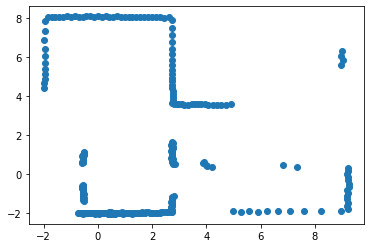

In [17]:
x = ranges * np.cos(np.arange(angle_min, angle_max, angle_increment))
y = ranges * np.sin(np.arange(angle_min, angle_max, angle_increment))
_=plt.scatter(x,y)